# DSGT: Survey of Models and Algorithms

Areas of Focus: 
- Classification
- Regression
- Clustering
- Dimensionality Reduction  

We will practice viewing a problem with a creative angle -- here repurposing housing pricing dataset to make discoveries on crime rates! 
<img src="https://media.licdn.com/dms/image/C4E0BAQGZ-7dAEaqmCg/company-logo_200_200/0?e=2159024400&v=beta&t=-9_7r8w3C8umvoQ8-67w1FcfzHdGQympxHup_2CPof8" style="height:100px">  

## Your lifelong aspiration has been to become a police officer, fighting crime! 
That said, you keep failing their fitness exams... But you want to help any way you can! 
You want to show that you can use your coding skills for good instead. You are prototyping a tool that can take in local housing data and determine crime rates in various areas of a city.

Using the Boston Housing Price dataset (very overused for explaining price prediciton...) you will find a way to classify high/low crime risk areas. You will also see if you can predict crime rates using regression! 

<img src="./materials/001-cyber.png" style="height:100px"> 


In [2]:
#Import all libraries needed:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Datasets and preprocessing:
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

#Principal Component Analysis
from sklearn.decomposition import PCA

#Neural Network example:
from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
%matplotlib inline
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Exploration  

<img src="./materials/002-house.png" style="height:100px"> 

In [3]:
## Get the data
boston = load_boston()
bostonDF = pd.DataFrame(data = boston.data, columns=boston.feature_names)

In [4]:
bostonDF["Price"] = boston.target
# bostonDF.describe()
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### Quiz: What features do you think are most relevant to crime rates?

- CRIM...... per capita crime rate by town
- ZN........       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS.....    proportion of non-retail business acres per town
- CHAS......     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX.......      nitric oxides concentration (parts per 10 million)
- RM........      average number of rooms per dwelling
- AGE.......      proportion of owner-occupied units built prior to 1940
- DIS  .......      weighted distances to five Boston employment centres  
- RAD  .......      index of accessibility to radial highways  
- TAX  .......      full-value property-tax rate per 10,000 
- PTRATIO  ...  pupil-teacher ratio by town  
- B  .........        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
- LSTAT  .....    % lower status of the population  
- MEDV  ......     Median value of owner-occupied homes in 1000's  

#####  Quiz: How comprehensive is our dataset? 
Fill in the blanks to find how many missing values we have, and how many datapoints we actually have

In [5]:
# is_empty(), is_missing(), isnull()
missing_val_count = bostonDF.isnull().sum()

# .length .width .shape
num_instances, num_features = bostonDF.shape

In [6]:
print("Example count: " + str(num_instances) + "\n")
print(missing_val_count)

Example count: 506

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64



#####  Quiz: We are looking at crime. But crime in this dataset is the crime in a given town... What is a potential problem with this...? Hint --> what is the code below trying to find? 

In [8]:
important_value = bostonDF.CRIM.value_counts()
print("The number of unique values is", len(important_value)) #get the number of entries in important_values

The number of unique values is 504


## Step 2: Regression  
This dataset is so commonly used for housing price estimation, but let's be different!
###### Predicting Crime Rate

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Prep the data
non_Crime_df = bostonDF.drop(['CRIM'], axis=1)
X = non_Crime_df
Y = bostonDF['CRIM']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [12]:
#helper function to measure accuracy and print out score
def generate_report(): 
    # how to get accuracy 
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    
    print('\tTrain', '\nRMSE is {}'.format(rmse))
    print('R2: {}'.format(r2))

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print('\tTest', '\nRMSE is {}'.format(rmse))
    print('R2: {}'.format(r2))

## Trying with all features: Naive! 
R^2 explains the variance and RMSE looks at distances from prediction to actual values... 
Given these ranges, are we doing well or poorly?

In [13]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
generate_report()

	Train 
RMSE is 6.053834943080592
R2: 0.46079907779962825
	Test 
RMSE is 7.431662542463459
R2: 0.36748032306678213


### Can we get better? Lets try fitting a model with fewer features. 
We will discuss how these were chosen later in the notebook!


In [14]:
interesting_cols = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'LSTAT', 'Price']
X = non_Crime_df[interesting_cols]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

generate_report()

	Train 
RMSE is 6.259250521599163
R2: 0.4235865008608827
	Test 
RMSE is 7.079319261781697
R2: 0.42603544232325685


In [ ]:
interesting_cols = [    ]


X = non_Crime_df[interesting_cols]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

generate_report()

##### Quiz: Try some feature combinations and find one that gives an r^2 of under .2

### Let's try other models: Polynomial Regression and a Decision Tree Regressor
Now we will try two other models -- one is a polynomial regressor and the other is a decision tree!


<img src="./materials/other_reg.png" style="height:250px"> 

https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png
https://www.nosimpler.me/polynomial-regression/

In [15]:
from sklearn.preprocessing import PolynomialFeatures

interesting_cols = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'LSTAT', 'Price']
X = non_Crime_df[interesting_cols]

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size = 0.3, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
generate_report()

	Train 
RMSE is 5.534592144222662
R2: 0.5493278517207849
	Test 
RMSE is 6.309465931306164
R2: 0.5440814341109412


In [17]:
from sklearn.tree import DecisionTreeRegressor   

interesting_cols = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'LSTAT', 'Price']
X = non_Crime_df[interesting_cols]

regressor = DecisionTreeRegressor(random_state = 3, max_depth=3, max_features=6, max_leaf_nodes=3)  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

regressor.fit(X_train, Y_train)
lin_model = regressor
generate_report()

	Train 
RMSE is 5.4416376271469025
R2: 0.5643389740245788
	Test 
RMSE is 6.668308266924362
R2: 0.4907472118032138


### Quiz: Given this output, what are 3 hyperparameters of the model? 

In [18]:
regressor

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=6,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

# Step 3:  Dimensionality Reduction  

What happens when we ran regression on ALL of the features?  
Our model did not do very well. This phenomenon of hgih dimensionality stems from the data overwhelming the model  
Too much data == too much complexity == not enough accuracy   

There are several ways to go about solving this issue, including.... 
- ML algorithms such as PCA or LDA
- Forward Feature Selection
- Statistical Analysis   
- Grid search
.... 

Here we look at statistical analysis and forward feature selection

#### Correlation and Heat Maps   
We can look at correlation coefficients to see which features may be most relevant to crime rates   
Do you remember: Which would be a positive, negative, or zero correlation?   


<img src="./materials/corr.png" style="height:150px">  
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZmIJtH1sb_HWFhMf71a147tQjeaADhAJ7vQuMpNhmOx5WgmA_

In [ ]:
# interesting_cols = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'LSTAT', 'Price']
# sns.pairplot(bostonDF[interesting_cols])

In [ ]:
# a = bostonDF.corr()
# sns.heatmap(a, cmap='plasma')

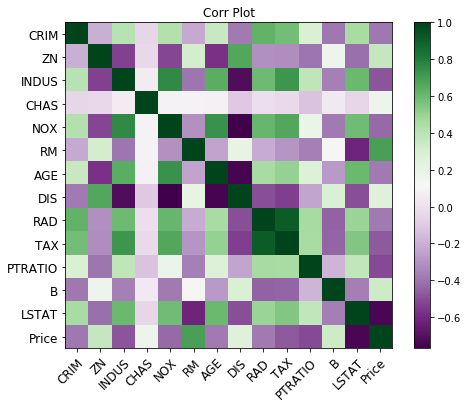

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
im = plt.imshow(bostonDF.corr(), cmap = 'PRGn')

labels = bostonDF.columns.tolist()

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)
ax.set_title('Corr Plot')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.colorbar(im)

### Quiz: From this, what are the most relevant features: Fill in the list and see if you match ours

In [ ]:
your_list_imp_features = [] # ex ["ZN, "INDUS"]
our_list_from_before = interesting_cols

In [ ]:
# compare your model results vs ours
# you can see from above what features we chose

In [ ]:
X = non_Crime_df[your_list_imp_features]

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size = 0.3, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
generate_report()

In [ ]:
X = non_Crime_df[interesting_cols]

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size = 0.3, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
generate_report()

## Forward Feature Selection  
Highly intuitive! Iterative method to determine the n most important features  

Steps: 
- For each feature:
    - Train your model on that feature and get score
    - Keep feature with best performance
- For that feature, loop through each other feature
    - Train model on that pair
    - Keep pair with best performance
...
- Stop when reach n features or when reach x accuracy 


In [ ]:
bostonDF.head(2)

In [ ]:
feature_names = bostonDF.columns
y = bostonDF.iloc[:,0].values #the last column is the band gap
y = y.reshape(-1,1)

for feature in feature_names: 
    new_X = bostonDF[feature]
    new_X = new_X.values.reshape(-1,1)
    model = LinearRegression() #create a linear regression model instance
    model.fit(new_X, y) #fit the model
    r2 = model.score(new_X, y) #get the "score", which is equivalent to r^2
    print("r^2 = {}".format(r2), feature)

#### Quiz:  Which features look the most useful?   

We would continue this loop for each pairs and use a threshold to settle at a "good enough" solution

## Bonus: Dimensionality Reduction with PCA  

See the mathematical fundamentals notebook for an example!

In [ ]:
#Display iris data:
iris = datasets.load_iris()
x = iris.data
x = StandardScaler().fit_transform(x)
y = iris.target
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df.head()

In [ ]:
pca = PCA(n_components = 2)
components = pca.fit_transform(x)
#Show principal components in a table:
PC = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2'])
PC.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for first and second components', fontsize = 20)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text(components[y == label, 0].mean(),
              components[y == label, 1].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(components[:,0],
            components[:,1],
            c = y,
            s = 50)
ax.grid()